В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [46]:
import pandas as pd
from pandas.api.types import is_string_dtype
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Data/cars.csv")
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


Переглянемо інформацію про всі колонки:

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


Перевіримо, чи колонки з типом даних object містять значення типу string та порахуємо кількість унікальних значень:

In [50]:
categorical_columns = ['Brand', 'Model', 'Fuel_Type', 'Transmission', 'Owner_Type']
for column in categorical_columns:
    is_string = pd.api.types.is_string_dtype(df[column])
    unique_count = df[column].nunique()
    print("Column:", column, "Is string:", is_string, "Unique values:", unique_count)

Column: Brand Is string: True Unique values: 11
Column: Model Is string: True Unique values: 58
Column: Fuel_Type Is string: True Unique values: 2
Column: Transmission Is string: True Unique values: 2
Column: Owner_Type Is string: True Unique values: 3


In [51]:
df['Owner_Type'].unique()

array(['First', 'Second', 'Third'], dtype=object)

В наборі даних 7 числових колонок (Year, Kilometers_Driven, Mileage, Engine, Power, Seats, Price)
і 5 категоріальних колонок з них:
- 2 бінарні (Fuel_Type, Transmission)
- 2 мультикатегоріальних зі значеннями, для яких немає відношення порядку (Brand, Model)
- 1 колонка, в якій можна встановити відношення порядку (Owner_Type: First, Second, Third)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [52]:
X_columns = ['Brand',	'Model',	'Year',	'Kilometers_Driven',	'Fuel_Type', 'Transmission', 'Owner_Type',	'Mileage',	'Engine',	'Power',	'Seats']
X = df[X_columns]
y = df.Price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

Кодуємо колонки з бінарними значеннями:

In [53]:
X_train.Fuel_Type.value_counts()

Fuel_Type
Petrol    41
Diesel    39
Name: count, dtype: int64

In [54]:
fuel_codes = {'Diesel': 0, 'Petrol': 1}
X_train['Fuel_Code'] = X_train.Fuel_Type.map(fuel_codes)
X_test['Fuel_Code'] = X_test.Fuel_Type.map(fuel_codes)

In [55]:
X_train.Transmission.value_counts()

Transmission
Automatic    49
Manual       31
Name: count, dtype: int64

In [56]:
transmission_codes = {'Manual': 0, 'Automatic': 1}
X_train['Transmission_Code'] = X_train.Transmission.map(transmission_codes)
X_test['Transmission_Code'] = X_test.Transmission.map(transmission_codes)

Кодуємо колонку Brand з використанням OneHotEncoder:

In [57]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])
enc.categories_

[array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
        'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)]

In [58]:
X_train[enc.categories_[0]] = enc.transform(X_train[['Brand']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Brand']]).toarray()

Кодуємо колонку Owner_Type з використанням Ordinal Encoder:

In [59]:
ordenc = preprocessing.OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

In [60]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Очікуваний результат після трансформацій:

In [61]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

Щодо колонки Model, на мою думку, можна згрупувати авто по класу, до якого вони належать.


In [62]:
car_classes = {
    "Compact Cars": [
        "Corolla", "Camry", "Civic", "Sonata", "Elantra", "Verna",
        "Vento", "Passat"
    ],
    "Subcompact Cars": [
        "Swift", "Santro", "Tiago", "Tigor", "Ameo", "Yaris", "Figo",
        "Polo", "Altroz", "Aspire", "City"
    ],
    "SUVs": [
        "Scorpio", "Vitara", "Thar", "Endeavour", "Ranger", "EcoSport", "Creta",
        "Harrier", "Safari", "Ertiga", "Tiguan", "T-Roc", "Innova",
        "Fortuner", "Innova Crysta", "S-Cross", "Venue", "Nexon",
        "WR-V", "BR-V", "XUV300"
    ],
    "Luxury Cars": [
        "A4", "A6", "A3", "A5", "Q3", "Q7", "3 Series", "5 Series",
        "7 Series", "X1", "X3", "X5", "C-Class", "E-Class", "GLC",
        "GLE", "GLA", "Mustang"
    ]
}

model_to_class = {model: car_class for car_class, models in car_classes.items() for model in models}

Створимо нову колонку Car Class:

In [63]:
X_train['Car Class'] = X_train['Model'].map(model_to_class)
X_test['Car Class'] = X_test['Model'].map(model_to_class)

Перевіримо чи всі рядки заповнені коректно:

In [64]:
display(X_train['Car Class'].isna().sum())
X_train[['Model','Car Class']].head()

0

,Model,Car Class
83,T-Roc,SUVs
55,A5,Luxury Cars
26,A6,Luxury Cars
54,Vento,Compact Cars
19,GLC,Luxury Cars


In [65]:
display(X_test['Car Class'].isna().sum())
X_test[['Model','Car Class']].head()

0

,Model,Car Class
17,Q3,Luxury Cars
41,Santro,Subcompact Cars
92,Vento,Compact Cars
14,Ertiga,SUVs
68,Aspire,Subcompact Cars


Закодуємо нову колонку Car Class з використанням OneHotEncoder:

In [66]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Car Class']])
enc.categories_

X_train[enc.categories_[0]] = enc.transform(X_train[['Car Class']]).toarray()
X_test[enc.categories_[0]] = enc.transform(X_test[['Car Class']]).toarray()

In [67]:
display(X_train.head(), X_test.head())

,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Car Class,Compact Cars,Luxury Cars,SUVs,Subcompact Cars
83,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,SUVs,0.0,0.0,1.0,0.0
55,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury Cars,0.0,1.0,0.0,0.0
26,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Luxury Cars,0.0,1.0,0.0,0.0
54,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Compact Cars,1.0,0.0,0.0,0.0
19,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Luxury Cars,0.0,1.0,0.0,0.0


,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Car Class,Compact Cars,Luxury Cars,SUVs,Subcompact Cars
17,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Luxury Cars,0.0,1.0,0.0,0.0
41,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Subcompact Cars,0.0,0.0,0.0,1.0
92,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,Compact Cars,1.0,0.0,0.0,0.0
14,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,SUVs,0.0,0.0,1.0,0.0
68,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,Subcompact Cars,0.0,0.0,0.0,1.0


**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [68]:
categorical_columns.append("Car Class")
X_train.drop(columns=categorical_columns, inplace=True)
X_test.drop(columns=categorical_columns, inplace=True)

In [69]:
Xy_train = pd.concat([X_train, y_train], axis=1)

corr = Xy_train.corr()
corr

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Compact Cars,Luxury Cars,SUVs,Subcompact Cars,Price
Year,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.355850,-0.104694,0.005012,0.462186,-0.233769
Kilometers_Driven,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,0.364231,-0.222641,0.147641,-0.239128,-0.083951
Mileage,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,0.162955,-0.455985,-0.044080,0.498574,-0.638404
Engine,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,-0.041736,0.497695,-0.099906,-0.481524,0.710561
Power,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,-0.100643,0.746725,-0.322702,-0.465471,0.849137
Seats,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,-0.121205,-0.193827,0.389643,-0.133716,0.000979
Fuel_Code,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,0.026324,0.007153,-0.202952,0.226244,-0.110782
Transmission_Code,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.168569,0.599787,-0.408996,-0.414697,0.680731
Audi,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,-0.133092,0.442043,-0.237915,-0.146829,0.328858
BMW,0.202517,-0.247042,-0.134105,0.287119,0.372652,-0.108079,-0.048475,0.283188,-0.118678,1.000000,-0.126761,-0.091928,-0.101380,-0.081680,-0.091928,-0.126761,-0.134568,-0.118678,-0.110250,0.009076,-0.142156,0.472148,-0.254118,-0.156829,0.477522


Колонки, які мають коефіцієнт кореляції з цільовою змінною більше 0.5:

In [70]:
corr.Price[np.abs(corr.Price) > 0.5]

Mileage             -0.638404
Engine               0.710561
Power                0.849137
Transmission_Code    0.680731
Luxury Cars          0.874731
Price                1.000000
Name: Price, dtype: float64

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [71]:
model = LinearRegression().fit(X_train, y_train)

In [72]:
y_hat_train = model.predict(X_train)
y_hat_test = model.predict(X_test)

In [73]:
loss_train = mean_squared_error(y_train, y_hat_train, squared=False)
loss_test = mean_squared_error(y_test, y_hat_test, squared=False)
loss_train, loss_test

(192479.0037768111, 243932.61262054238)

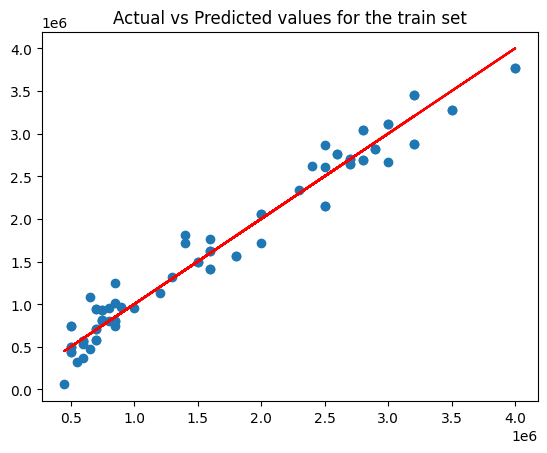

In [74]:
x = y

plt.scatter(y_train, y_hat_train)
plt.plot(x, y, color="red")

plt.title('Actual vs Predicted values for the train set')

plt.show()

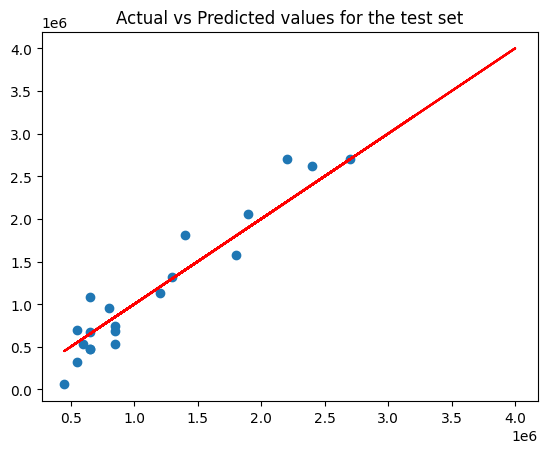

In [75]:
plt.scatter(y_test, y_hat_test)
plt.plot(x, y, color="red")

plt.title('Actual vs Predicted values for the test set')

plt.show()

Спостереження:

Графік демонструє лінійний зв’язок між прогнозованими та фактичними значеннями, оскільки більшість точок знаходяться поблизу червоної лінії, яка відображає ідеальний сценарій, коли прогнозовані значення ідеально відповідають фактичним значенням. Загалом відхилення є відносно невеликими, однак є кілька точок, які більш суттєво відхиляються від червоної лінії. Ці викиди можуть вказувати на випадки, коли прогнози моделі менш точні, однак враховуючи маленький розмір датасету, особливо тестового, складно зробити остаточні висновки, чи модель потребує вдосконалення, чи ми маємо справу з кількома викидами.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

Масштабуємо дані:

In [76]:
numerical_columns = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']

scaler = preprocessing.StandardScaler()
scaler.fit(X_train[numerical_columns])

X_train[numerical_columns] = scaler.transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [77]:
display(X_train.head(), X_test.head())

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Compact Cars,Luxury Cars,SUVs,Subcompact Cars
83,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
55,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
26,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
54,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
19,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Code,Transmission_Code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Compact Cars,Luxury Cars,SUVs,Subcompact Cars
17,-2.107952,1.051030,-0.604696,-0.785333,-0.231967,-0.303562,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
41,0.568813,-0.257646,0.861234,-1.255859,-1.214487,-0.303562,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0
92,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
14,1.461068,-1.130096,0.568048,-0.683310,-0.784634,2.394771,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68,0.568813,-0.257646,0.861234,-1.091404,-0.895168,-0.303562,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,1.0


In [78]:
model_scaled = LinearRegression().fit(X_train, y_train)

In [79]:
weights = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights.sort_values('weight', key=abs, ascending=False)

,feature,weight
24,1,1.615871e+06
8,Audi,1.218348e+06
15,Mercedes,1.149136e+06
9,BMW,1.086949e+06
13,Mahindra,-8.152792e+05
4,Power,6.116252e+05
12,Hyundai,-6.014851e+05
14,Maruti,-5.964878e+05
21,Luxury Cars,-5.025579e+05
11,Honda,-4.363571e+05


Спостереження:

Найвпливовішими з точки зору коефіцієнтів є колонки, які визначають бренд автомобіля (найвищі позитивні коефіцієнти мають елітні Audi, Mercedes i BMW, бюджетний Mahindra має найнижчий негативний коефіцієнт), а також Power.

Для більшості коефіцієнтів напрям їх дії є інтуітивним (наприклад, в випадку з вищенаведеними Audi, Mercedes, BMW, Power, а також Fuel_Code - ціна зменшується для дизельних авто, Transmission_Code - ціна вище для автоматичної коробки передач, Kilometers_Driven і Mileage також призводять для зниження ціни). А от для деяких коефіцієнтів напрям їх дії є неочікуваним, наприклад, для Engine та Luxury Cars. Моє припущення - це відбувається тому, що ці змінні сильно корелюють з іншими (наприклад, Luxury Cars - з Audi, BMW i Audi), і коефіцієнти цих колонок вже значно повпливали на передбачення ціни.



**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [80]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
results = model.fit()

results.params.sort_values(key=abs, ascending=False)

Audi                 1.327898e+06
Mercedes             1.258686e+06
const                1.205056e+06
BMW                  1.196499e+06
Mahindra            -7.057286e+05
Power                6.116252e+05
SUVs                 5.905115e+05
Hyundai             -4.919345e+05
Maruti              -4.869372e+05
Compact Cars         4.127621e+05
Subcompact Cars      4.030764e+05
Fuel_Code           -3.315951e+05
Honda               -3.268065e+05
Transmission_Code    2.733408e+05
Volkswagen          -2.661632e+05
Ford                -2.163820e+05
Luxury Cars         -2.012938e+05
Tata                -1.979278e+05
Toyota               1.138525e+05
Kilometers_Driven   -8.573418e+04
Mileage             -6.508690e+04
Seats               -3.045477e+04
Year                 2.493753e+04
Engine              -1.386139e+04
Owner_Type_Codes     6.018309e+03
dtype: float64

In [81]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     72.16
Date:                Wed, 22 May 2024   Prob (F-statistic):           9.47e-34
Time:                        19:59:00   Log-Likelihood:                -1086.9
No. Observations:                  80   AIC:                             2220.
Df Residuals:                      57   BIC:                             2275.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.205e+06   6.41e+04     18.811      0.000    1.08e+06    1.33e+06
Year               2.494e+04   6.12e+04      0.407      0.685   -9.76e+04    1.47e+05
Kilometers_Driven -8.573e+04   5.41e+04     -1.585      0.119   -1.94e+05    2.26e+04
Mileage           -6.509e+04   6.09e+04     -1.069      0.290   -1.87e+05    5.68e+04
Engine            -1.386e+04   6.76e+04     -0.205      0.838   -1.49e+05    1.22e+05
Power              6.116e+05   8.31e+04      7.356      0.000    4.45e+05    7.78e+05
Seats             -3.045e+04   4.19e+04     -0.727      0.470   -1.14e+05    5.35e+04
Fuel_Code         -3.316e+05   8.52e+04     -3.892      0.000   -5.02e+05   -1.61e+05
Transmission_Code  2.733e+05   8.99e+04      3.041      0.004    9.34e+04    4.53e+05
Audi               1.328e+06   1.98e+05      6.713      0.000    9.32e+05    1.72e+06
BMW                1.196e+06   1.83e+05      6.555      0.000    8.31e+05    1.56e+06
Ford              -2.164e+05   1.04e+05     -2.088      0.041   -4.24e+05   -8824.304
Honda             -3.268e+05   1.49e+05     -2.189      0.033   -6.26e+05   -2.79e+04
Hyundai           -4.919e+05   1.19e+05     -4.142      0.000    -7.3e+05   -2.54e+05
Mahindra          -7.057e+05   1.42e+05     -4.983      0.000   -9.89e+05   -4.22e+05
Maruti            -4.869e+05   1.25e+05     -3.911      0.000   -7.36e+05   -2.38e+05
Mercedes           1.259e+06   1.82e+05      6.916      0.000    8.94e+05    1.62e+06
Tata              -1.979e+05   1.54e+05     -1.285      0.204   -5.06e+05    1.11e+05
Toyota             1.139e+05   1.24e+05      0.919      0.362   -1.34e+05    3.62e+05
Volkswagen        -2.662e+05   1.21e+05     -2.197      0.032   -5.09e+05   -2.36e+04
Owner_Type_Codes   6018.3093   7.85e+04      0.077      0.939   -1.51e+05    1.63e+05
Compact Cars       4.128e+05   1.09e+05      3.778      0.000    1.94e+05    6.32e+05
Luxury Cars       -2.013e+05   2.23e+05     -0.904      0.370   -6.47e+05    2.45e+05
SUVs               5.905e+05   9.34e+04      6.321      0.000    4.03e+05    7.78e+05
Subcompact Cars    4.031e+05   1.46e+05      2.757      0.008     1.1e+05    6.96e+05
==============================================================================
Omnibus:                        0.969   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.968
Skew:                          -0.112   Prob(JB):                        0.616
Kurtosis:                       2.509   Cond. No.                     2.35e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-31. This might indicate that there are
strong multicollinearity 

Виведемо всі колонки, для яких p-value менше 0.05:

In [82]:
df_summary = results.summary2().tables[1]
df_summary_p_005 = df_summary[df_summary['P>|t|']<0.05]
df_summary_p_005['P>|t|']

const                4.028713e-26
Power                8.108108e-10
Fuel_Code            2.626471e-04
Transmission_Code    3.557188e-03
Audi                 9.552112e-09
BMW                  1.745681e-08
Ford                 4.131481e-02
Honda                3.268928e-02
Hyundai              1.150344e-04
Mahindra             6.156742e-06
Maruti               2.471603e-04
Mercedes             4.399238e-09
Volkswagen           3.209976e-02
Compact Cars         3.803771e-04
SUVs                 4.261349e-08
Subcompact Cars      7.825087e-03
Name: P>|t|, dtype: float64

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [83]:
p_005_columns = df_summary_p_005.index

model2 = sm.OLS(y_train, X[p_005_columns])
results2 = model2.fit()

results2.params.sort_values(key=abs, ascending=False)

Mercedes             1.303947e+06
BMW                  1.279932e+06
Audi                 1.277067e+06
const                9.411465e+05
SUVs                 6.829883e+05
Power                6.100870e+05
Mahindra            -5.124001e+05
Subcompact Cars      4.613616e+05
Compact Cars         4.457086e+05
Hyundai             -4.292260e+05
Maruti              -3.184353e+05
Transmission_Code    3.084767e+05
Honda               -2.995016e+05
Fuel_Code           -2.282644e+05
Volkswagen          -1.180382e+05
Ford                -1.022182e+05
dtype: float64

In [84]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     93.35
Date:                Wed, 22 May 2024   Prob (F-statistic):           1.57e-37
Time:                        19:59:00   Log-Likelihood:                -1096.2
No. Observations:                  80   AIC:                             2224.
Df Residuals:                      64   BIC:                             2263.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9.411e+05   2.62e+05      3.592      0.001    4.18e+05    1.46e+06
Power              6.101e+05   6.19e+04      9.859      0.000    4.86e+05    7.34e+05
Fuel_Code         -2.283e+05   6.08e+04     -3.754      0.000    -3.5e+05   -1.07e+05
Transmission_Code  3.085e+05   8.99e+04      3.433      0.001    1.29e+05    4.88e+05
Audi               1.277e+06   2.49e+05      5.135      0.000     7.8e+05    1.77e+06
BMW                 1.28e+06   2.29e+05      5.594      0.000    8.23e+05    1.74e+06
Ford              -1.022e+05    1.2e+05     -0.851      0.398   -3.42e+05    1.38e+05
Honda             -2.995e+05   1.33e+05     -2.244      0.028   -5.66e+05   -3.29e+04
Hyundai           -4.292e+05   1.27e+05     -3.370      0.001   -6.84e+05   -1.75e+05
Mahindra          -5.124e+05   1.45e+05     -3.524      0.001   -8.03e+05   -2.22e+05
Maruti            -3.184e+05   1.33e+05     -2.386      0.020   -5.85e+05   -5.18e+04
Mercedes           1.304e+06   2.37e+05      5.512      0.000    8.31e+05    1.78e+06
Volkswagen         -1.18e+05    1.2e+05     -0.986      0.328   -3.57e+05    1.21e+05
Compact Cars       4.457e+05   2.62e+05      1.699      0.094   -7.82e+04     9.7e+05
SUVs                6.83e+05   2.54e+05      2.693      0.009    1.76e+05    1.19e+06
Subcompact Cars    4.614e+05   2.98e+05      1.546      0.127   -1.35e+05    1.06e+06
==============================================================================
Omnibus:                        0.328   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.161
Skew:                           0.110   Prob(JB):                        0.923
Kurtosis:                       3.013   Cond. No.                         33.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Спостереження:

В другої моделі R2 і Adj. R-squared трохи нижчі в порівнянні з першою, але це все ще дуже високі значення, обидві моделі добре підходять для даних.

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [85]:
df_summary_p_025 = df_summary[df_summary['P>|t|']<0.25]
p_025_columns = df_summary_p_025.index

model3 = sm.OLS(y_train, X[p_025_columns])
results3 = model3.fit()

results3.params.sort_values(key=abs, ascending=False)

Audi                 1.172521e+06
Mercedes             1.141359e+06
const                1.133232e+06
BMW                  1.073458e+06
Mahindra            -7.858909e+05
SUVs                 7.627983e+05
Power                6.212997e+05
Hyundai             -6.138585e+05
Maruti              -5.894663e+05
Compact Cars         5.606076e+05
Subcompact Cars      5.447473e+05
Honda               -5.302168e+05
Volkswagen          -3.693533e+05
Tata                -3.250212e+05
Ford                -3.029122e+05
Fuel_Code           -2.865511e+05
Transmission_Code    2.718282e+05
Kilometers_Driven   -9.397467e+04
dtype: float64

In [86]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     97.72
Date:                Wed, 22 May 2024   Prob (F-statistic):           3.73e-38
Time:                        19:59:00   Log-Likelihood:                -1088.4
No. Observations:                  80   AIC:                             2213.
Df Residuals:                      62   BIC:                             2256.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.133e+06   2.57e+05      4.414      0.000     6.2e+05    1.65e+06
Kilometers_Driven -9.397e+04   3.61e+04     -2.600      0.012   -1.66e+05   -2.17e+04
Power              6.213e+05   5.82e+04     10.671      0.000    5.05e+05    7.38e+05
Fuel_Code         -2.866e+05   6.01e+04     -4.769      0.000   -4.07e+05   -1.66e+05
Transmission_Code  2.718e+05   8.34e+04      3.258      0.002    1.05e+05    4.39e+05
Audi               1.173e+06   2.44e+05      4.804      0.000    6.85e+05    1.66e+06
BMW                1.073e+06   2.23e+05      4.808      0.000    6.27e+05    1.52e+06
Ford              -3.029e+05   1.28e+05     -2.368      0.021   -5.59e+05   -4.72e+04
Honda             -5.302e+05   1.39e+05     -3.801      0.000   -8.09e+05   -2.51e+05
Hyundai           -6.139e+05    1.3e+05     -4.740      0.000   -8.73e+05   -3.55e+05
Mahindra          -7.859e+05   1.54e+05     -5.111      0.000   -1.09e+06   -4.79e+05
Maruti            -5.895e+05   1.45e+05     -4.076      0.000   -8.79e+05      -3e+05
Mercedes           1.141e+06   2.31e+05      4.949      0.000     6.8e+05     1.6e+06
Tata               -3.25e+05    1.2e+05     -2.711      0.009   -5.65e+05   -8.54e+04
Volkswagen        -3.694e+05    1.3e+05     -2.833      0.006    -6.3e+05   -1.09e+05
Compact Cars       5.606e+05   2.61e+05      2.152      0.035    3.98e+04    1.08e+06
SUVs               7.628e+05   2.43e+05      3.140      0.003    2.77e+05    1.25e+06
Subcompact Cars    5.447e+05   2.78e+05      1.963      0.054   -1.01e+04     1.1e+06
==============================================================================
Omnibus:                        2.041   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.409
Skew:                          -0.042   Prob(JB):                        0.494
Kurtosis:                       2.355   Cond. No.                         35.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Висновок:

Третя модель має майже такий самий R-squared як і перша (0.964 проти 0.965), при цьому трохи вищий Adj. R-squared (0.954 проти 0.952). Також третя модель має кращі інші показники - F-statistic, AIC, BIC. Для використання я би обрала третю, оскільки вона пропонує найкращий баланс точності і сладності моделі.